<a href="https://colab.research.google.com/github/firecutter/A.I-PROJECTS/blob/main/diasdasmaes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Coleta de Dados


In [62]:
import pandas as pd
import random
import numpy as np

# Gerar dados fictícios de mães (com 1000 registros)
idades = np.random.randint(25, 61, 1000)
rendas = np.random.randint(1000, 20000, 1000)
categorias = ['Perfume', 'Livro', 'Roupas', 'Eletrodoméstico', 'Tecnologia']
localizacoes = ['São Paulo', 'Rio de Janeiro', 'Belo Horizonte', 'Porto Alegre', 'Curitiba', 'Brasilia', 'Recife', 'Salvador', 'Manaus', 'Fortaleza', 'Natal', 'Florianópolis']

# Probabilidade corrigida, somando 1
localizacao_probabilidade = [0.10, 0.10, 0.08, 0.08, 0.08, 0.07, 0.07, 0.07, 0.07, 0.06, 0.06, 0.06]

# Verificando se as probabilidades somam 1
print(f"Soma das probabilidades: {sum(localizacao_probabilidade)}")

# Se a soma não for 1, precisamos corrigir isso. Vamos garantir que as probabilidades somem 1.
if sum(localizacao_probabilidade) != 1:
    localizacao_probabilidade = [p / sum(localizacao_probabilidade) for p in localizacao_probabilidade]
    print(f"Probabilidades normalizadas: {localizacao_probabilidade}")
else:
    print("Probabilidades já somam 1.")

# Gerando as localizações com as probabilidades corrigidas
localizacoes = np.random.choice(localizacoes, size=1000, p=localizacao_probabilidade)

estados_civis = ['Casada', 'Solteira', 'Divorciada', 'Viúva']
estado_civil_probabilidade = [0.40, 0.30, 0.20, 0.10]
estado_civil = np.random.choice(estados_civis, size=1000, p=estado_civil_probabilidade)

filhos = np.random.randint(0, 6, 1000)

# Ajustando as probabilidades para a distribuição das categorias
categoria_produto_probabilidade = [0.25, 0.20, 0.20, 0.15, 0.20]
categoria = np.random.choice(categorias, size=1000, p=categoria_produto_probabilidade)

maes = pd.DataFrame({
    'ID': [i for i in range(1, 1001)],
    'Idade': idades,
    'Renda': rendas,
    'localização': localizacoes,
    'estado civil': estado_civil,
    'filhos': filhos,
    'categoria': categoria
})

produtos = pd.DataFrame({
    'Produto': ['Perfume A', 'Livro B', 'Camiseta C', 'Liquidificador D', 'Smartphone E'],
    'Categoria': ['Perfume', 'Livro', 'Roupas', 'Eletrodoméstico', 'Tecnologia'],
    'Preço': [100, 50, 70, 150, 120],
})

print(maes.head())
print(produtos.head())

Soma das probabilidades: 0.9000000000000004
Probabilidades normalizadas: [0.11111111111111108, 0.11111111111111108, 0.08888888888888885, 0.08888888888888885, 0.08888888888888885, 0.07777777777777775, 0.07777777777777775, 0.07777777777777775, 0.07777777777777775, 0.06666666666666664, 0.06666666666666664, 0.06666666666666664]
   ID  Idade  Renda     localização estado civil  filhos        categoria
0   1     46   5390    Porto Alegre       Casada       4          Perfume
1   2     44   5925        Brasilia       Casada       5       Tecnologia
2   3     40  16777    Porto Alegre     Solteira       5  Eletrodoméstico
3   4     58  15760  Belo Horizonte     Solteira       0  Eletrodoméstico
4   5     43   7393   Florianópolis   Divorciada       4          Perfume
            Produto        Categoria  Preço
0         Perfume A          Perfume    100
1           Livro B            Livro     50
2        Camiseta C           Roupas     70
3  Liquidificador D  Eletrodoméstico    150
4      Sma

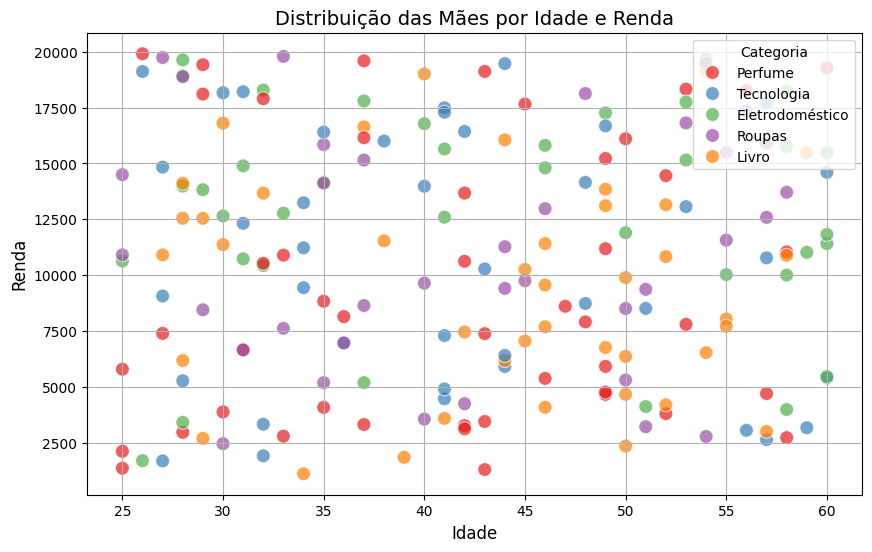

<ipython-input-63-c76a00ce2eb4>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categoria_count.index, y=categoria_count.values, palette='Set1')


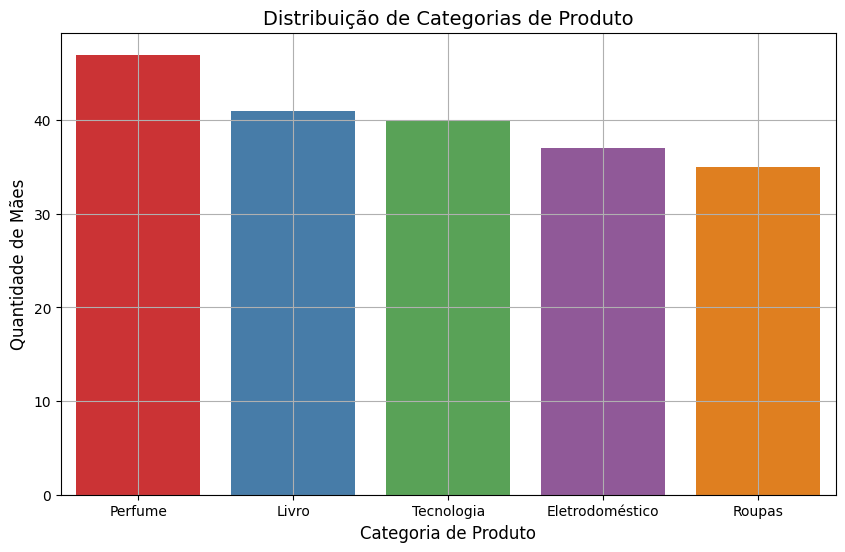

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecionando apenas uma população de 200 pessoas
maes_subset = maes.head(200)

# Gráfico de dispersão (Idade vs. Renda)
plt.figure(figsize=(10, 6))

sns.scatterplot(data=maes_subset, x='Idade', y='Renda', hue='categoria', palette='Set1', s=100, alpha=0.7)

plt.title('Distribuição das Mães por Idade e Renda', fontsize=14)
plt.xlabel('Idade', fontsize=12)
plt.ylabel('Renda', fontsize=12)

plt.legend(title="Categoria", loc='upper right')
plt.grid(True)
plt.show()

# Contagem das categorias de produto
categoria_count = maes_subset['categoria'].value_counts()

# Gráfico de barras (Distribuição de Categorias de Produto)
plt.figure(figsize=(10, 6))
sns.barplot(x=categoria_count.index, y=categoria_count.values, palette='Set1')

plt.title('Distribuição de Categorias de Produto', fontsize=14)
plt.xlabel('Categoria de Produto', fontsize=12)
plt.ylabel('Quantidade de Mães', fontsize=12)

plt.grid(True)
plt.show()

In [64]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
maes[['Idade', 'Renda']] = scaler.fit_transform(maes[['Idade', 'Renda']])

print(maes.head())

   ID     Idade     Renda     localização estado civil  filhos  \
0   1  0.298186 -0.912994    Porto Alegre       Casada       4   
1   2  0.105746 -0.814198        Brasilia       Casada       5   
2   3 -0.279134  1.189791    Porto Alegre     Solteira       5   
3   4  1.452827  1.001986  Belo Horizonte     Solteira       0   
4   5  0.009526 -0.543109   Florianópolis   Divorciada       4   

         categoria  
0          Perfume  
1       Tecnologia  
2  Eletrodoméstico  
3  Eletrodoméstico  
4          Perfume  


**scraping

In [ ]:
!pip install selenium pandas

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
import pandas as pd
import time
import random


def coletar_produtos_amazon(termo_busca, categoria_nome, min_itens=100, max_itens=200):
    options = Options()
    options.add_argument('--headless')
    options.add_argument('--disable-gpu')
    options.add_argument('--no-sandbox')
    options.add_argument('--disable-dev-shm-usage')
    options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 Chrome/113.0.0.0 Safari/537.36")

    driver = webdriver.Chrome(options=options)

    produtos = []
    precos = []
    links = []
    categorias = []

    pagina = 1
    while len(produtos) < max_itens:
        url = f"https://www.amazon.com.br/s?k={termo_busca}&page={pagina}"
        driver.get(url)
        time.sleep(random.uniform(2, 4))

        resultados = driver.find_elements(By.CSS_SELECTOR, "div.s-main-slot div.s-result-item")

        if not resultados:
            break
        for r in resultados:
            try:
                titulo = r.find_element(By.TAG_NAME, "h2").text
                link = r.find_element(By.TAG_NAME, "a").get_attribute("href")

                try:
                    preco = r.find_element(By.CLASS_NAME, "a-price-whole").text
                    preco = int(preco.replace('.', '').replace(',', ''))
                except:
                    preco = None

                if preco:
                    produtos.append(titulo)
                    precos.append(preco)
                    links.append(link)
                    categorias.append(categoria_nome)

                if len(produtos) >= max_itens:
                    break
            except:
                continue
        pagina += 1

    driver.quit()

    df = pd.DataFrame({
        'Produto': produtos,
        'Categoria': categorias,
        'Preço': precos,
        'Link': links
    })

    if len(df) < min_itens:
        print(f"Atenção: Apenas {len(df)} itens coletados. A meta mínima era {min_itens}.")
    return df


categorias_busca = {
    "Perfume": "perfume feminino dia das mães",
    "Livro": "livro presente mãe",
    "Roupas": "roupa feminina presente mãe",
    "Eletrodoméstico": "liquidificador presente mãe",
    "Tecnologia": "smartphone presente mãe"
}


dfs = []
for categoria, termo in categorias_busca.items():
    df_categoria = coletar_produtos_amazon(
        termo_busca=termo,
        categoria_nome=categoria,
        min_itens=50,
        max_itens=200
    )
    dfs.append(df_categoria)


df_produtos = pd.concat(dfs, ignore_index=True)


df_produtos.to_csv("produtos_amazon_maes.csv", index=False, encoding='utf-8-sig')

print(df_produtos.head(10))

Atenção: Apenas 47 itens coletados. A meta mínima era 50.
Atenção: Apenas 47 itens coletados. A meta mínima era 50.


In [ ]:
from sklearn.neighbors import NearestNeighbors


knn = NearestNeighbors(n_neighbors=3)
knn.fit(maes[['Idade', 'Renda']])

perfil_mae = [[30, 5000]]
distancias, indices = knn.kneighbors(perfil_mae)


mothers_recommendations = maes.iloc[indices[0]]
print(mothers_recommendations)

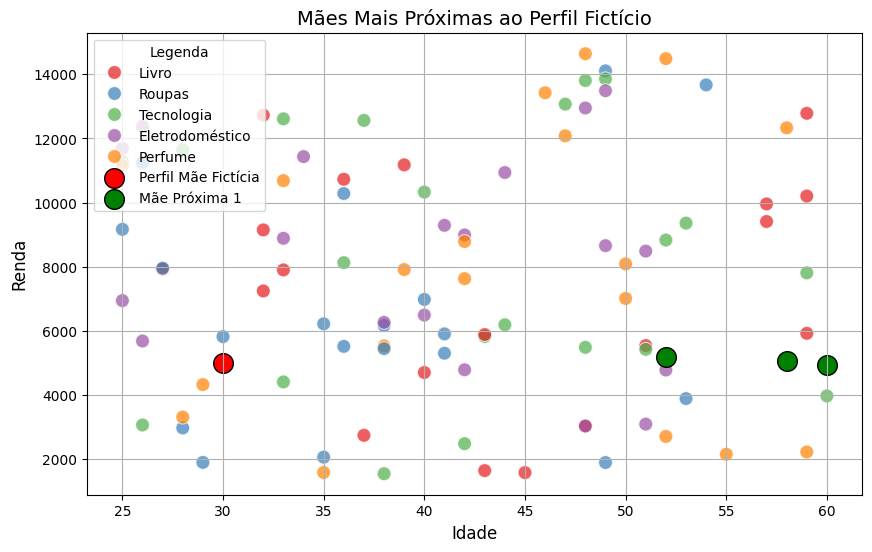

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotando todas as mães no gráfico
plt.figure(figsize=(10, 6))
sns.scatterplot(data=maes, x='Idade', y='Renda', hue='categoria', palette='Set1', s=100, alpha=0.7)

# Plotando o perfil da mãe fictícia
plt.scatter(perfil_mae[0][0], perfil_mae[0][1], color='red', s=200, label='Perfil Mãe Fictícia', edgecolor='black')

# Destacando as mães mais próximas
for i in range(len(mothers_recommendations)):
    plt.scatter(mothers_recommendations.iloc[i]['Idade'], mothers_recommendations.iloc[i]['Renda'],
                color='green', s=200, edgecolor='black', label=f'Mãe Próxima {i+1}' if i == 0 else "")

# Adicionando título, rótulos e legenda
plt.title('Mães Mais Próximas ao Perfil Fictício', fontsize=14)
plt.xlabel('Idade', fontsize=12)
plt.ylabel('Renda', fontsize=12)
plt.legend(title="Legenda", loc='upper left')

# Exibindo o gráfico
plt.grid(True)
plt.show()

In [ ]:
!pip install streamlit


import streamlit as st

# Título da aplicação
st.title('Recomendação de Produtos para o Dia das Mães')

# Entrada de dados do usuário
idade = st.slider('Idade da mãe', 18, 100, 30)
renda = st.slider('Renda mensal da mãe (R$)', 1500, 15000, 5000)

# Modelo de Recomendação
perfil_mae_input = [[idade, renda]]
distancias, indices = knn.kneighbors(perfil_mae_input)

# Exibindo as mães mais próximas
mothers_recommendations = maes.iloc[indices[0]]

# Exibindo os produtos recomendados
st.subheader("Mães semelhantes encontradas:")
st.write(mothers_recommendations)

st.subheader("Produtos recomendados:")
for categoria in mothers_recommendations['Idade']:
    if categoria == "Perfume":
        st.write(produtos[produtos['Categoria'] == "Perfume"])
    elif categoria == "Livro":
        st.write(produtos[produtos['Categoria'] == "Livro"])

!pip install streamlit pyngrok


2025-05-08 19:35:49.596 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-08 19:35:49.597 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-08 19:35:49.600 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-08 19:35:49.602 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-08 19:35:49.603 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-08 19:35:49.605 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-08 19:35:49.606 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-08 19:35:49.609 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar